In [5]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [7]:
df=pd.read_csv(r'C:\Users\asus\OneDrive\Desktop\ml_projects\notebook\cleaned_stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,avarage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [11]:
x=df.drop(columns=['total','avarage'],axis=1)

In [12]:
y=df['total']

In [ ]:
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [14]:
y

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total, Length: 1000, dtype: int64

In [21]:
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
num_trans=StandardScaler()
cat_trans=OneHotEncoder()
preprocess=ColumnTransformer(
    [
        ("onehotencode",cat_trans,cat_features),
        ("standardscalar",num_trans,num_features)
    ]
)

In [23]:
x=preprocess.fit_transform(x)

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)
x_train.shape,x_test.shape

((700, 20), (300, 20))

In [68]:
def evalute_models(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mse)
    r2=r2_score(true,predicted)
    return mse,rmse,r2

In [69]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_name=[]
test_r2=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    #preds
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    #evalution of models
    model_mse,model_rmse,model_r2=evalute_models(y_train,y_train_pred)
    model_test_mse,model_test_rmse,model_test_r2=evalute_models(y_test,y_test_pred)
    print(list(models.keys())[i])
    model_name.append(list(models.keys())[i])
    
    print("----> train data evalution")
    print(f"rmse is {model_rmse}")
    print(f"r2 is {model_r2}")
    print("----------------------------------")
    print("----> test data evalution")
    print(f"rmse is {model_test_rmse}")
    print(f"r2 is {model_test_r2}")
    print("================================")
    test_r2.append(model_test_r2)

Linear Regression
----> train data evalution
rmse is 3.8969884601562196e-14
r2 is 1.0
----------------------------------
----> test data evalution
rmse is 4.252189162476395e-14
r2 is 1.0
Lasso
----> train data evalution
rmse is 1.0689880272876966
r2 is 0.9993553477701741
----------------------------------
----> test data evalution
rmse is 1.1191547046229964
r2 is 0.9993540643704281
Ridge
----> train data evalution
rmse is 0.027436834133256982
r2 is 0.9999995753336959
----------------------------------
----> test data evalution
rmse is 0.02918272681898643
r2 is 0.9999995608016188
K-Neighbors Regressor
----> train data evalution
rmse is 7.380205184913803
r2 is 0.9692732462780814
----------------------------------
----> test data evalution
rmse is 8.41836088558812
r2 is 0.9634519617832485
Decision Tree
----> train data evalution
rmse is 0.0
r2 is 1.0
----------------------------------
----> test data evalution
rmse is 5.3351038727782365
r2 is 0.9853210581462816
Random Forest Regressor
---

In [70]:
pd.DataFrame(list(zip(model_name, test_r2)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
1,Lasso,0.999354
7,CatBoosting Regressor,0.994237
6,XGBRegressor,0.992529
5,Random Forest Regressor,0.992227
4,Decision Tree,0.985321
8,AdaBoost Regressor,0.979351
3,K-Neighbors Regressor,0.963452


In [71]:
###linear regression selected
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [72]:
y_pred=lr.predict(x_test)

In [73]:
msee=r2_score(y_test,y_pred)
print(msee)

1.0


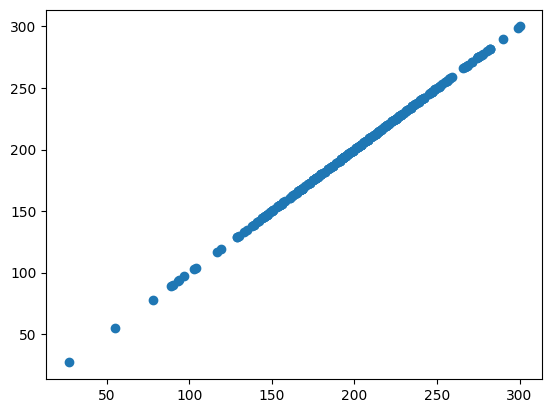

In [74]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='total'>

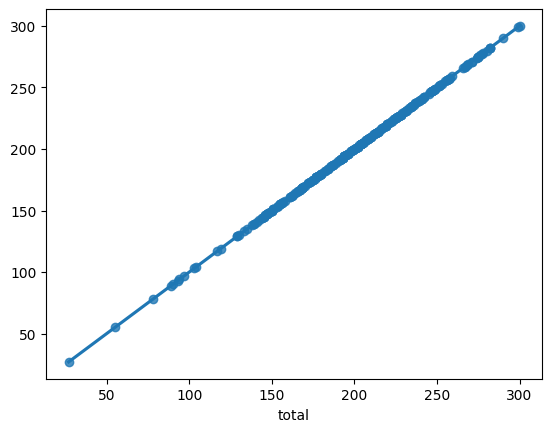

In [75]:
import seaborn as sb
sb.regplot(x=y_test,y=y_pred)

In [80]:
pd.DataFrame({'actual':y_test,'predicted':y_pred,'diff':y_test-y_pred.astype(int)})

,actual,predicted,diff
519,224,224.0,0
837,236,236.0,0
208,231,231.0,1
525,187,187.0,0
978,144,144.0,0
...,...,...,...
91,97,97.0,0
114,299,299.0,1
948,151,151.0,0
229,277,277.0,1
